 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [152]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [153]:
pip install hvplot


Note: you may need to restart the kernel to use updated packages.


In [154]:
whale_csv = Path('Resources/whale_returns.csv')
algo_csv = Path('Resources/algo_returns.csv')
sp500_csv = Path('sp500_history.csv')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [155]:
import os
os.getcwd()

'/Users/nickmescain/Desktop/Fintech Workspace/HW-MODULE-4-Pandas-challenge/Instructions/Homework-4-whale-analysis'

In [156]:
# Reading whale return whale_returns.csv")
whale_returns = pd.read_csv(whale_csv,
 index_col= 'Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [157]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [158]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [159]:
# Reading algorithmic returns


algoreturns_df = pd.read_csv(Path("Resources/algo_returns.csv"),
 index_col='Date',infer_datetime_format= True, parse_dates=True)
algoreturns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [160]:
# Count nulls
algoreturns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [161]:
# Drop nulls
algo_returns=algoreturns_df.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [162]:
# Reading S&P 500 Closing Prices
sp500_data = pd.read_csv(Path("Resources/sp500_history.csv"),
 index_col='Date',infer_datetime_format= True, parse_dates=True)
sp500_data.sort_index(inplace=True) 
sp500_data.head()



,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [163]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [164]:
# Fix Data Types
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].str.replace(",", "")
sp500_data["Close"] = sp500_data["Close"].astype("float")
sp500_data.dtypes

/Users/nickmescain/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [165]:
# Calculate Daily Returns
sp500_data = sp500_data.pct_change()
sp500_data.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [166]:
# Drop nulls
sp500_data.dropna(inplace=True)
sp500_data

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [167]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data.columns = ['SP500_Returns'] 
sp500_data




,SP500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [168]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_combined_returns = pd.concat([whale_returns,algo_returns, sp500_data], axis ='columns', join='inner')
#whale_combined_returns.sort_index(inplace=True)
whale_combined_returns
 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

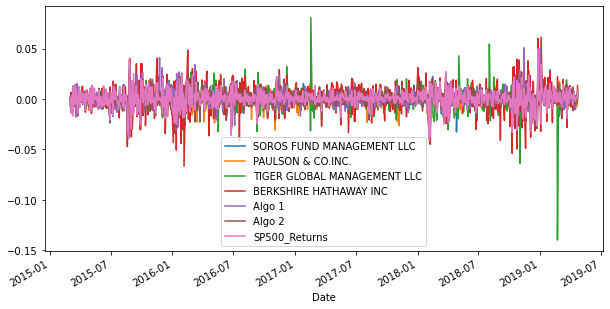

In [169]:
# Plot daily returns of all portfolios
whale_combined_returns.plot( 
  figsize=(10,5)
  )

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

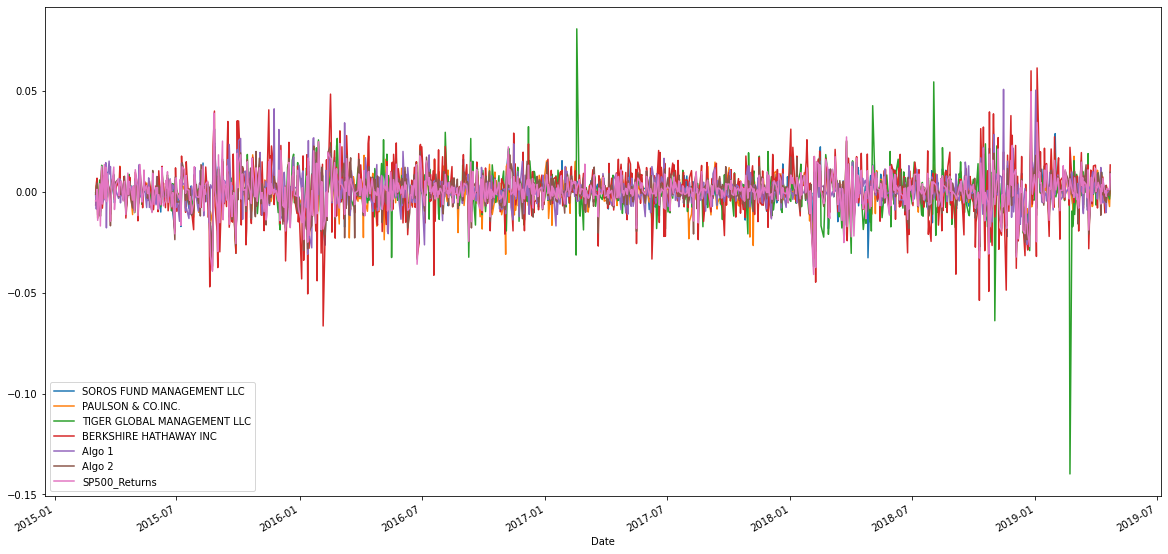

In [170]:
# Calculate cumulative returns of all portfolios
whale_combined_returns_combo = (whale_combined_returns + 1).cumprod() 
# Plot cumulative returns
whale_combined_returns.plot(
figsize=(20,10)
)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

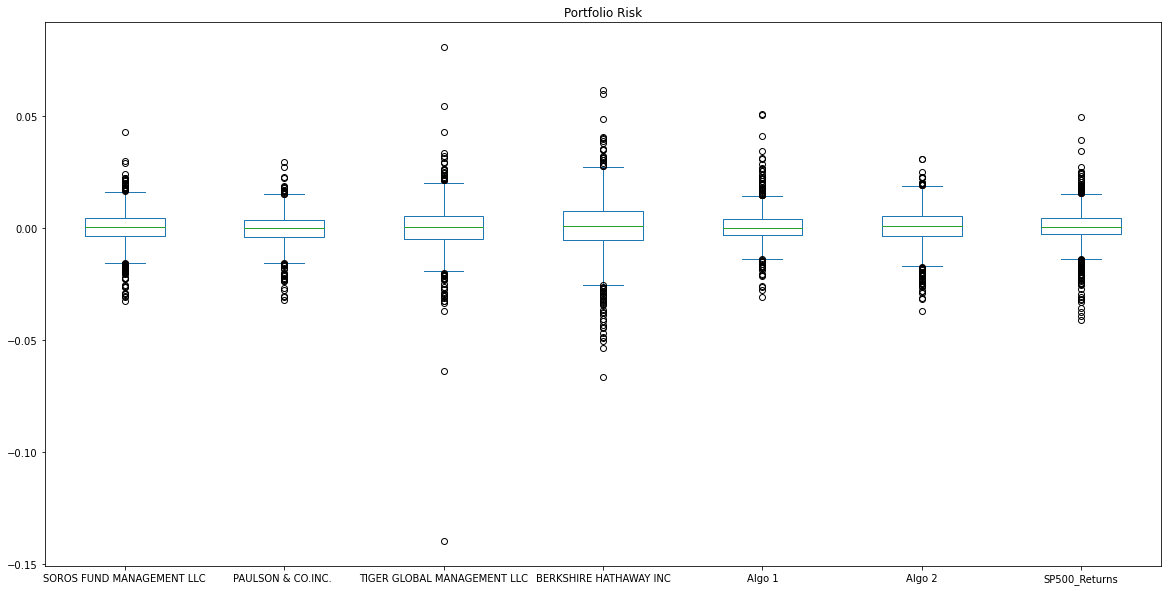

In [171]:
# Box plot to visually show risk
whale_combined_returns.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [172]:
# Calculate the daily standard deviations of all portfolios
daily_std = whale_combined_returns.std().sort_values(ascending=False)
whale_combined_returns.dropna
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500_Returns                  0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

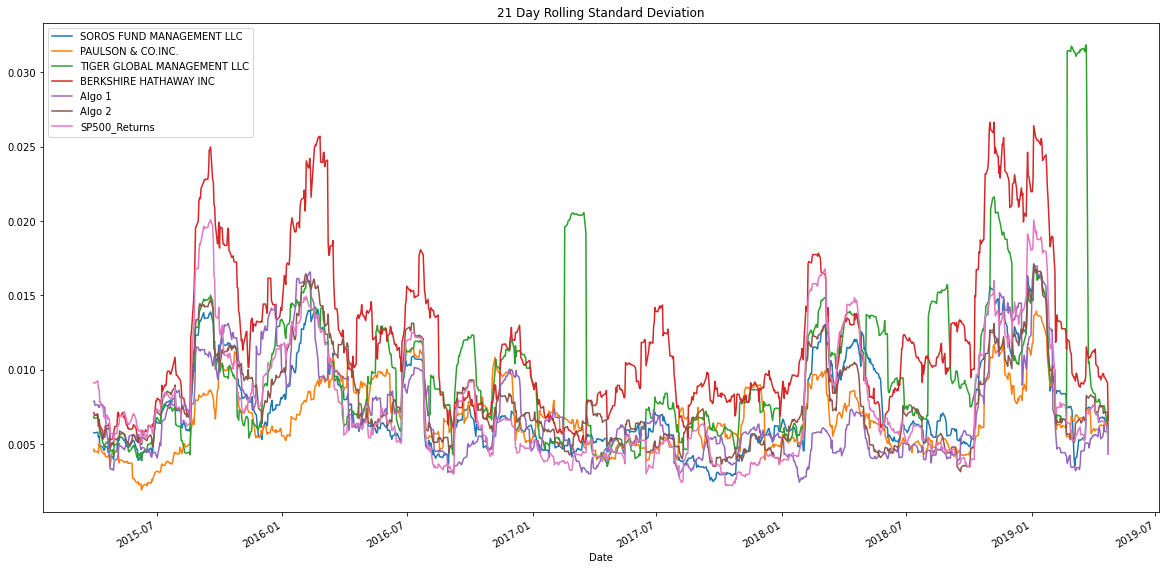

In [173]:
# Calculate  the daily standard deviation of S&P 500
whale_combined_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))
# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [174]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500_Returns                  0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

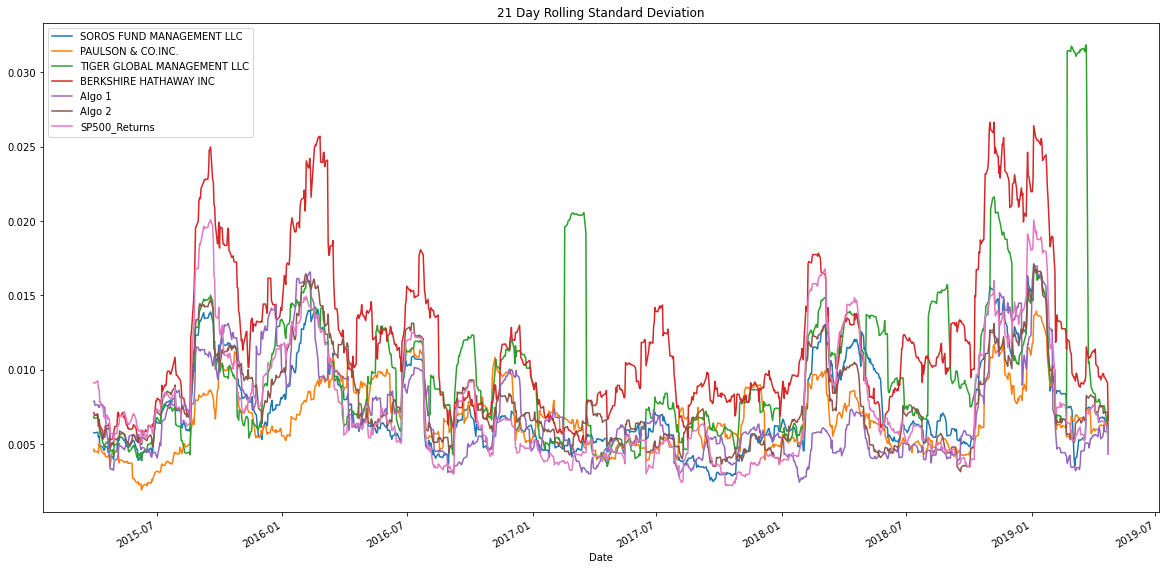

In [175]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
whale_combined_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [176]:
# Calculate the correlation
correlation = whale_combined_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [177]:
# Calculate covariance of a single portfolio
soros_cov = whale_combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(whale_combined_returns['SP500 Returns'])
# Calculate variance of S&P 500
variance = whale_combined_returns['SP500_Returns'].rolling(window=60).var()
# Computing beta
beta = soros_cov/variance
# Plot beta trend
beta.plot()

KeyError: 'SP500 Returns'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

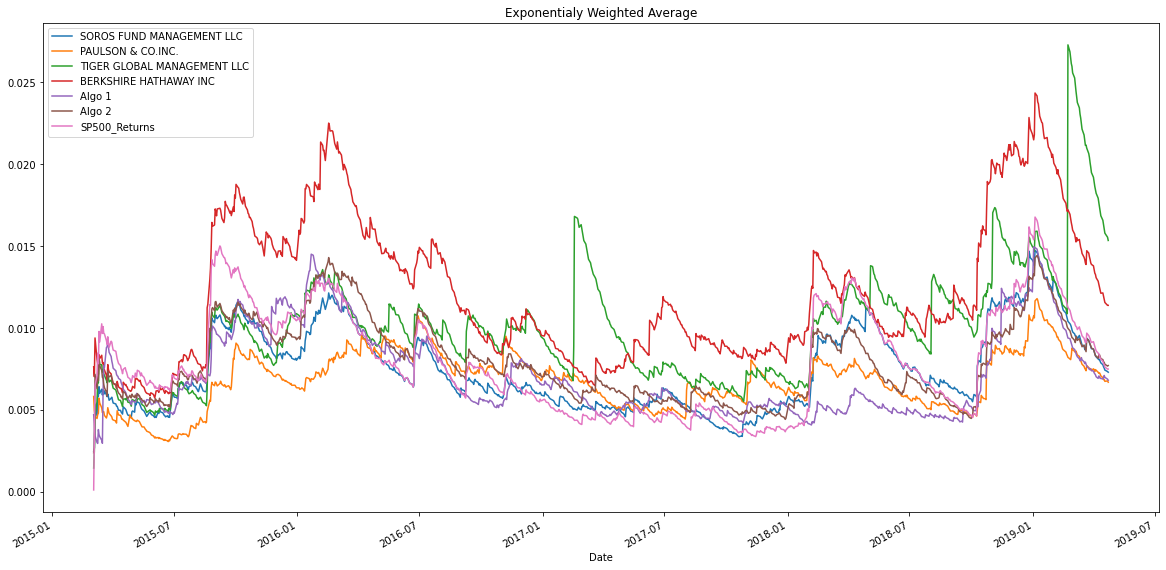

In [ ]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = whale_combined_returns.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (whale_combined_returns.mean() * 252) / (whale_combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500_Returns                  0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

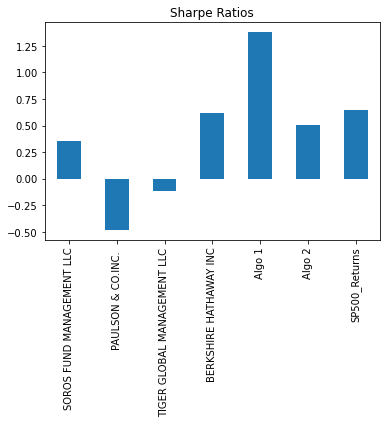

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithim 1 outperforms all the other whales.Algorithim 2 outperforms all except for the S&P500 OR Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
import os
os.getcwd()

'/Users/nickmescain/Desktop/Fintech Workspace/HW-MODULE-4-Pandas-challenge/Instructions/Homework-4-whale-analysis'

In [ ]:
apple_csv = Path('Resources/aapl_historical.csv')
costco_csv = Path('Resources/cost_historical.csv')
google_csv = Path('goog_historical.csv')

In [ ]:
# Reading data from apple

apple = Path("../Module-4-Challenge/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(apple_csv, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
aapl_df.sort_index(inplace= True)
aapl_df = aapl_df.drop(columns=['Symbol'])
aapl_df


,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [ ]:
# Reading data from 2nd stock
costco = Path("../Module-4-Challenge/Resources/cost_historical.csv")
costco_df = pd.read_csv(costco_csv, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
costco_df.sort_index(inplace= True)
costco_df = costco_df.drop(columns=['Symbol'])
costco_df

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [ ]:
# Reading data from 3rd stock
google = Path("../Module-4-Challenge/Resources/goog_historical.csv")
goog_df = pd.read_csv(google, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
goog_df.sort_index(inplace= True)
goog_df = goog_df.drop(columns=['Symbol'])
goog_df

FileNotFoundError: [Errno 2] No such file or directory: '../Module-4-Challenge/Resources/goog_historical.csv'

In [179]:
# Combine all stocks in a single DataFrame
combined_port_df = pd.concat([aapl_df,costco_df], axis = 'columns',join='inner')
combined_port_df.columns=['AAPL','COST',]
combined_port_df

,AAPL,COST
Trade DATE,,
2018-05-11,188.59,195.76
2018-05-14,188.15,195.88
2018-05-15,186.44,195.48
2018-05-16,188.18,198.71
2018-05-17,186.99,199.60
...,...,...
2019-05-03,211.75,244.62
2019-05-06,208.48,244.23
2019-05-07,202.86,240.18


In [181]:

# Calculate daily returns
portfolio_daily_returns = combined_port_df.pct_change()
# Drop NAs
portfolio_daily_returns.dropna(inplace=True)
# Display sample data
portfolio_daily_returns




,AAPL,COST
Trade DATE,,
2018-05-14,-0.002333,0.000613
2018-05-15,-0.009088,-0.002042
2018-05-16,0.009333,0.016523
2018-05-17,-0.006324,0.004479
2018-05-18,-0.003637,-0.003206
...,...,...
2019-05-03,0.012431,0.007953
2019-05-06,-0.015443,-0.001594
2019-05-07,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [185]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_total = portfolio_daily_returns

# Display sample data
portfolio_total

,AAPL,COST
Trade DATE,,
2018-05-14,-0.002333,0.000613
2018-05-15,-0.009088,-0.002042
2018-05-16,0.009333,0.016523
2018-05-17,-0.006324,0.004479
2018-05-18,-0.003637,-0.003206
...,...,...
2019-05-03,0.012431,0.007953
2019-05-06,-0.015443,-0.001594
2019-05-07,-0.026957,-0.016583


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [187]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!